# DSCI 617 - Homework 3
**Jeffery Boczkaja**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, expr

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

## Part 1: Terminology

1. StructType
2. StruckField
3. FloatType
4. show()
5. describe() and summary()
6. dropna()
7. withColumn() and select()
8. agg()
9. col() and expr()
10. where()

## Problem 2: Columns and Expressions

1, 2, 5, 6, 10

## Problem 3: Diamonds Data (Part 1)

In [0]:
diamonds_schema = """
carat DOUBLE,
cut STRING,
color STRING,
clarity STRING,
depth DOUBLE,
table DOUBLE,
price INT,
x DOUBLE,
y DOUBLE,
z DOUBLE
"""

diamonds = spark.read.option("delimiter", "\t").option("header", "true").schema(diamonds_schema).csv("/FileStore/tables/diamonds.txt")
diamonds.printSchema()

root
 |-- carat: double (nullable = true)
 |-- cut: string (nullable = true)
 |-- color: string (nullable = true)
 |-- clarity: string (nullable = true)
 |-- depth: double (nullable = true)
 |-- table: double (nullable = true)
 |-- price: integer (nullable = true)
 |-- x: double (nullable = true)
 |-- y: double (nullable = true)
 |-- z: double (nullable = true)



In [0]:
num_rows = diamonds.count()
print(num_rows)

53940


In [0]:
diamonds.show(10)

+-----+---------+-----+-------+-----+-----+-----+----+----+----+
|carat|      cut|color|clarity|depth|table|price|   x|   y|   z|
+-----+---------+-----+-------+-----+-----+-----+----+----+----+
| 0.23|    Ideal|    E|    SI2| 61.5| 55.0|  326|3.95|3.98|2.43|
| 0.21|  Premium|    E|    SI1| 59.8| 61.0|  326|3.89|3.84|2.31|
| 0.23|     Good|    E|    VS1| 56.9| 65.0|  327|4.05|4.07|2.31|
| 0.29|  Premium|    I|    VS2| 62.4| 58.0|  334| 4.2|4.23|2.63|
| 0.31|     Good|    J|    SI2| 63.3| 58.0|  335|4.34|4.35|2.75|
| 0.24|Very Good|    J|   VVS2| 62.8| 57.0|  336|3.94|3.96|2.48|
| 0.24|Very Good|    I|   VVS1| 62.3| 57.0|  336|3.95|3.98|2.47|
| 0.26|Very Good|    H|    SI1| 61.9| 55.0|  337|4.07|4.11|2.53|
| 0.22|     Fair|    E|    VS2| 65.1| 61.0|  337|3.87|3.78|2.49|
| 0.23|Very Good|    H|    VS1| 59.4| 61.0|  338| 4.0|4.05|2.39|
+-----+---------+-----+-------+-----+-----+-----+----+----+----+
only showing top 10 rows



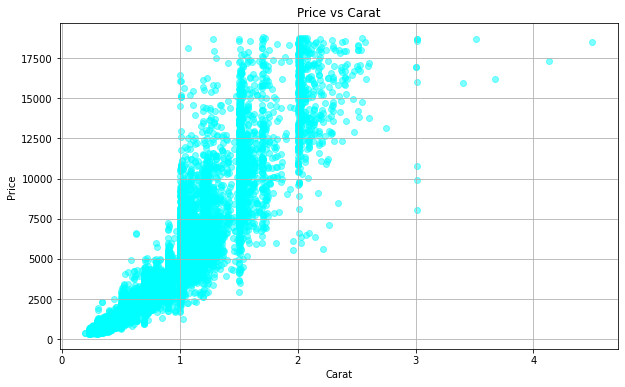

In [0]:
sample_df = diamonds.sample(fraction=0.25, seed=1)
sample_pdf = sample_df.toPandas()
plt.figure(figsize=(10,6))
plt.scatter(sample_pdf['carat'], sample_pdf['price'], alpha=0.5, color='aqua')
plt.title('Price vs Carat')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.grid(True)
plt.show()

## Problem 4: Diamonds Data (Part 2)

In [0]:
diamonds.sort(col("price").desc()).show(5)

+-----+---------+-----+-------+-----+-----+-----+----+----+----+
|carat|      cut|color|clarity|depth|table|price|   x|   y|   z|
+-----+---------+-----+-------+-----+-----+-----+----+----+----+
| 2.29|  Premium|    I|    VS2| 60.8| 60.0|18823| 8.5|8.47|5.16|
|  2.0|Very Good|    G|    SI1| 63.5| 56.0|18818| 7.9|7.97|5.04|
| 1.51|    Ideal|    G|     IF| 61.7| 55.0|18806|7.37|7.41|4.56|
| 2.07|    Ideal|    G|    SI2| 62.5| 55.0|18804| 8.2|8.13|5.11|
|  2.0|Very Good|    H|    SI1| 62.8| 57.0|18803|7.95| 8.0|5.01|
+-----+---------+-----+-------+-----+-----+-----+----+----+----+
only showing top 5 rows



In [0]:
diamonds.orderBy(col("carat").desc()).show(5)

+-----+-------+-----+-------+-----+-----+-----+-----+-----+----+
|carat|    cut|color|clarity|depth|table|price|    x|    y|   z|
+-----+-------+-----+-------+-----+-----+-----+-----+-----+----+
| 5.01|   Fair|    J|     I1| 65.5| 59.0|18018|10.74|10.54|6.98|
|  4.5|   Fair|    J|     I1| 65.8| 58.0|18531|10.23|10.16|6.72|
| 4.13|   Fair|    H|     I1| 64.8| 61.0|17329| 10.0| 9.85|6.43|
| 4.01|Premium|    I|     I1| 61.0| 61.0|15223|10.14| 10.1|6.17|
| 4.01|Premium|    J|     I1| 62.5| 62.0|15223|10.02| 9.94|6.24|
+-----+-------+-----+-------+-----+-----+-----+-----+-----+----+
only showing top 5 rows



In [0]:
diamonds_ppc = diamonds.withColumn("price_per_carat", (col("price") / col("carat") * 100).cast('int') / 100.0)
diamonds_ppc.sort(col("price_per_carat").desc()).show(5)

+-----+---------+-----+-------+-----+-----+-----+----+----+----+---------------+
|carat|      cut|color|clarity|depth|table|price|   x|   y|   z|price_per_carat|
+-----+---------+-----+-------+-----+-----+-----+----+----+----+---------------+
| 1.04|Very Good|    D|     IF| 61.3| 56.0|18542|6.53|6.55|4.01|       17828.84|
| 1.07|  Premium|    D|     IF| 60.9| 58.0|18279|6.67|6.57|4.03|       17083.17|
| 1.03|    Ideal|    D|     IF| 62.0| 56.0|17590|6.55|6.44|4.03|       17077.66|
| 1.07|Very Good|    D|     IF| 60.9| 58.0|18114|6.57|6.67|4.03|       16928.97|
| 1.02|Very Good|    D|     IF| 61.7| 59.0|17100|6.42|6.52|3.99|        16764.7|
+-----+---------+-----+-------+-----+-----+-----+----+----+----+---------------+
only showing top 5 rows



In [0]:
diamonds_ppc.sort("price_per_carat").show(5)

+-----+-------+-----+-------+-----+-----+-----+----+----+----+---------------+
|carat|    cut|color|clarity|depth|table|price|   x|   y|   z|price_per_carat|
+-----+-------+-----+-------+-----+-----+-----+----+----+----+---------------+
| 0.43|Premium|    H|     I1| 62.0| 59.0|  452|4.78|4.83|2.98|        1051.16|
| 0.32|Premium|    E|     I1| 60.9| 58.0|  345|4.38|4.42|2.68|        1078.12|
| 0.31|   Good|    J|    SI2| 63.3| 58.0|  335|4.34|4.35|2.75|        1080.64|
| 0.33|  Ideal|    J|    SI2| 62.4| 54.0|  366|4.43|4.45|2.77|        1109.09|
| 0.31|  Ideal|    J|    SI2| 62.2| 54.0|  344|4.35|4.37|2.71|        1109.67|
+-----+-------+-----+-------+-----+-----+-----+----+----+----+---------------+
only showing top 5 rows



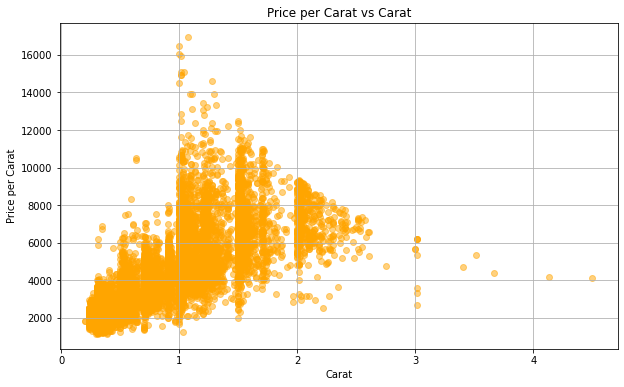

In [0]:
ppcsample = diamonds_ppc.sample(fraction=0.25, seed=1)
ppc_sample_pdf = ppcsample.toPandas()
plt.figure(figsize=(10,6))
plt.scatter(ppc_sample_pdf['carat'], ppc_sample_pdf['price_per_carat'], alpha=0.5, color='orange')
plt.title('Price per Carat vs Carat')
plt.xlabel('Carat')
plt.ylabel('Price per Carat')
plt.grid(True)
plt.show()